In [1]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load some data for an example
ifile = '/data1/antonk/tmp/SIDRR_v1.0/SIDRR_20230102.nc'
with xa.open_dataset(ifile, decode_times=False) as ds:
    ids1 = ds.ids1.to_numpy()
    ids2 = ds.ids2.to_numpy()
    ids3 = ds.ids3.to_numpy()
    idpair = ds.idpair.to_numpy()
    start_lat1 = ds.start_lat1.to_numpy()
    start_lat2 = ds.start_lat2.to_numpy()
    start_lat3 = ds.start_lat3.to_numpy()
    start_lon1 = ds.start_lon1.to_numpy()
    start_lon2 = ds.start_lon2.to_numpy()
    start_lon3 = ds.start_lon3.to_numpy()
    shr = ds.shr.to_numpy()

In [3]:
# select data from only only on image pair
p0idx = np.nonzero(idpair == 1)[0]

ids1 = ids1[p0idx]
ids2 = ids2[p0idx]
ids3 = ids3[p0idx]
start_lat1 = start_lat1[p0idx]
start_lat2 = start_lat2[p0idx]
start_lat3 = start_lat3[p0idx]
start_lon1 = start_lon1[p0idx]
start_lon2 = start_lon2[p0idx]
start_lon3 = start_lon3[p0idx]
shr = shr[p0idx]


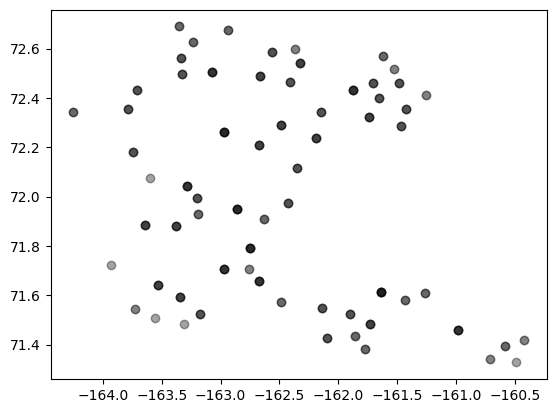

In [4]:
# plot start points with transparency
# not that some points are darker than others - that's where the data is duplicated
plt.plot(start_lon1, start_lat1, 'ko', alpha=0.2)
plt.plot(start_lon2, start_lat2, 'ko', alpha=0.2)
plt.plot(start_lon3, start_lat3, 'ko', alpha=0.2)


In [5]:
# stack data for this image pair
ids = np.hstack([ids1, ids2, ids3])
lat = np.hstack([start_lat1, start_lat2, start_lat3])
lon = np.hstack([start_lon1, start_lon2, start_lon3])

In [6]:
print(f'Dataset size can be reduced {ids.size / np.unique(ids).size} times')

Dataset size can be reduced 4.909090909090909 times


In [7]:
# the main 'trick'
# find indices of unique indices and inversion
_, unq_idx, unq_inv = np.unique(ids, return_index=True, return_inverse=True)

In [8]:
# reduce the data: keep only unique lon/lat values
start_lat = lat[unq_idx]
start_lon = lon[unq_idx]

In [9]:
# create 'triangulation': indices of corners for every element in 3XN matrix
tri = unq_inv.reshape(3, -1).T

In [10]:
# simple check that original latitutdes and packed/unpacked latitudes are the same
print(start_lat[tri] - np.vstack([start_lat1, start_lat2, start_lat3]).T)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

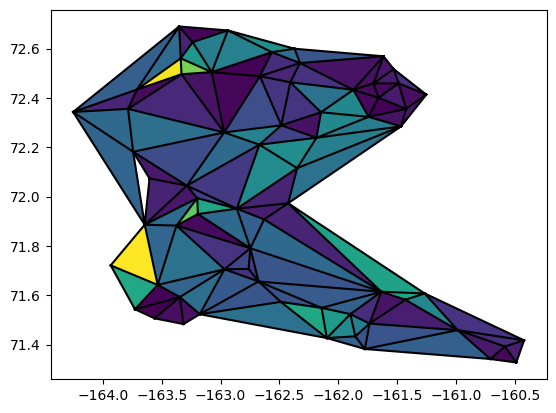

In [11]:
# use triangulation for plotting
plt.tripcolor(start_lon, start_lat, shr, triangles=tri)
plt.triplot(start_lon, start_lat, tri, color='k')
